In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Train',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
)

testing_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Test',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   'Valid',
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [3]:
class_names = training_dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
train_data = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_data = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [5]:
resize_scale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [6]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [7]:
input_shape = (32, IMAGE_SIZE, IMAGE_SIZE, 3)

model = tf.keras.Sequential([
    resize_scale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(len(class_names),activation='softmax'),
])
model.build(input_shape=input_shape)

In [8]:
model.summary()
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [9]:
history = model.fit(
    training_dataset,
    epochs=17, 
    batch_size=32,
    verbose=1,
    validation_data=validation_dataset
)
model.evaluate(test_data)

Epoch 1/17


29/29 [==============================] - 28s 818ms/step - loss: 1.0717 - accuracy: 0.3633 - val_loss: 0.9186 - val_accuracy: 0.6533
Epoch 2/17
29/29 [==============================] - 17s 596ms/step - loss: 0.6802 - accuracy: 0.6744 - val_loss: 0.5490 - val_accuracy: 0.7967
Epoch 3/17
29/29 [==============================] - 17s 580ms/step - loss: 0.4937 - accuracy: 0.7678 - val_loss: 0.6066 - val_accuracy: 0.7567
Epoch 4/17
29/29 [==============================] - 17s 570ms/step - loss: 0.4040 - accuracy: 0.8256 - val_loss: 0.9027 - val_accuracy: 0.6233
Epoch 5/17
29/29 [==============================] - 17s 576ms/step - loss: 0.5222 - accuracy: 0.7322 - val_loss: 0.3616 - val_accuracy: 0.8433
Epoch 6/17
29/29 [==============================] - 17s 598ms/step - loss: 0.3460 - accuracy: 0.8544 - val_loss: 0.3262 - val_accuracy: 0.8733
Epoch 7/17
29/29 [==============================] - 17s 572ms/step - loss: 0.3291 - accuracy: 0.8744 - val_loss: 0.2510 - val_accuracy: 0.90

[0.19348588585853577, 0.9333333373069763]

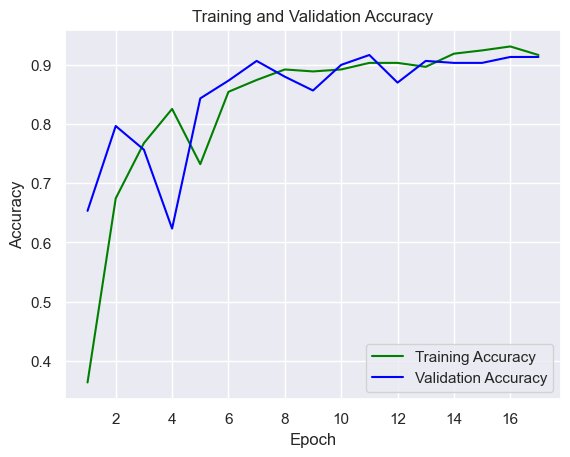

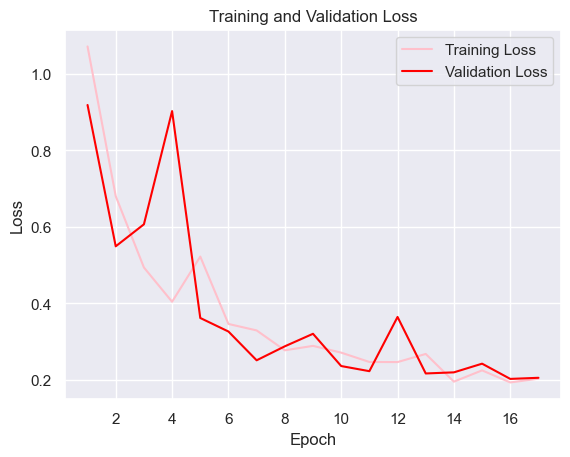

In [10]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

The Image Title :  Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Model Predicted label :  Potato___Late_blight


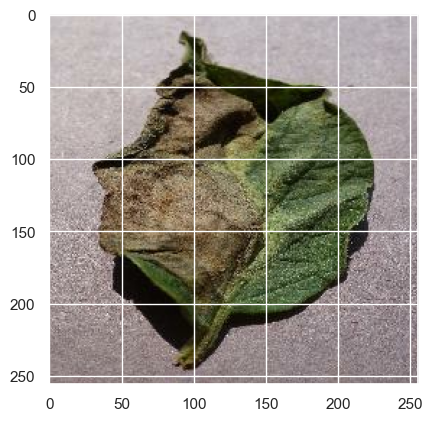

In [11]:
for image_batch,label_batch in test_data.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("The Image Title : ",class_names[label_batch[0].numpy()])
    prediction = model.predict(image_batch)
    print("Model Predicted label : ",class_names[np.argmax(prediction[1])])
     

In [12]:
model.save("Potato-Disease_Classification.hdf5")
from tensorflow.keras.models import load_model

# load model 
model = load_model('Potato-Disease_Classification.h5')

# check model info 
model.summary()


C:\Users\rames\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OSError: No file or directory found at Potato-Disease_Classification.h5

In [ ]:
tf.__version__

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test data and make predictions
for image_batch, label_batch in test_data:
    predictions = model.predict(image_batch)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(label_batch.numpy())

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Display confusion matrix
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(cm, display_labels=class_names).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
